# Desafio 1: Análise de Dados de Voos

**Objetivo do notebook**

Analisar dados de voos para identificar padrões, atrasos e características das operações aéreas usando análise exploratória de dados.

**Tarefas:**

1. Carregar e explorar a estrutura dos dados
2. Realizar análise exploratória de dados (EDA)
3. Analisar padrões de atrasos
4. Identificar insights sobre companhias aéreas e rotas
5. Visualizar distribuições e correlações

## 1. Importação das Bibliotecas

In [31]:
# Instalação das bibliotecas necessárias
%pip install pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# Carregamento dos dados

In [33]:
# Carregamento dos dados de voos
df = pd.read_csv("atividade2 - flights_100.csv")

print(f"Dataset carregado: {df.shape[0]} linhas e {df.shape[1]} colunas")

Dataset carregado: 100 linhas e 9 colunas


# Exploração dos dados

In [34]:
df.shape

(100, 9)

In [35]:
df.head()

,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,ARR_DELAY,DISTANCE
0,2023-01-01,AZUL,N1000,GIG,FOR,1369,7.0,32.0,4984
1,2023-01-02,SW,N1001,BSB,MIA,1986,-42.0,-38.0,4200
2,2023-01-03,LATAM,N1002,ORD,REC,1534,-30.0,21.0,1833
3,2023-01-04,AZUL,N1003,JFK,FOR,146,-39.0,52.0,2352
4,2023-01-05,UA,N1004,GIG,SFO,1734,-24.0,42.0,710


In [36]:
df.columns

Index(['FL_DATE', 'OP_UNIQUE_CARRIER', 'TAIL_NUM', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'DEP_DELAY', 'ARR_DELAY', 'DISTANCE'],
      dtype='object')

In [37]:
df.dtypes

FL_DATE               object
OP_UNIQUE_CARRIER     object
TAIL_NUM              object
ORIGIN                object
DEST                  object
CRS_DEP_TIME           int64
DEP_DELAY            float64
ARR_DELAY            float64
DISTANCE               int64
dtype: object

In [38]:
df.describe()

,CRS_DEP_TIME,DEP_DELAY,ARR_DELAY,DISTANCE
count,100.00000,90.000000,90.000000,100.000000
mean,1242.93000,9.066667,7.688889,2897.620000
std,686.19325,33.684525,39.095574,1420.354052
min,16.00000,-57.000000,-103.000000,337.000000
25%,626.00000,-15.000000,-20.500000,1859.250000
50%,1230.50000,7.000000,6.000000,2940.000000
75%,1812.25000,33.250000,36.250000,4266.000000
max,2331.00000,106.000000,90.000000,4984.000000


In [39]:
df.isnull().sum()

FL_DATE               0
OP_UNIQUE_CARRIER     0
TAIL_NUM              0
ORIGIN                0
DEST                  0
CRS_DEP_TIME          0
DEP_DELAY            10
ARR_DELAY            10
DISTANCE              0
dtype: int64

# Visualizações

<Axes: >

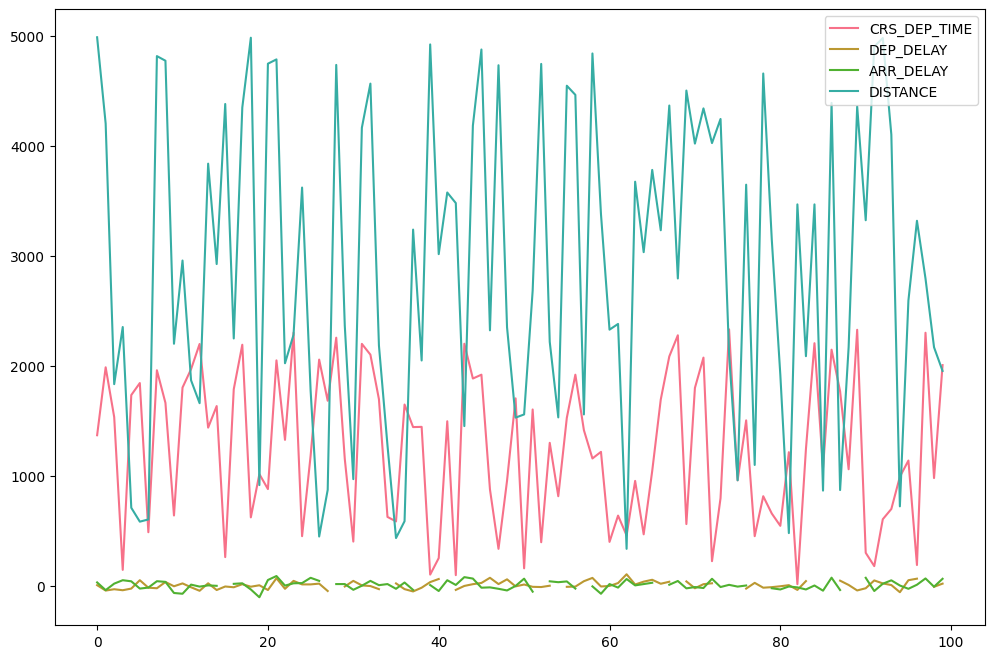

In [40]:
df.plot()

# Análise de distribuições

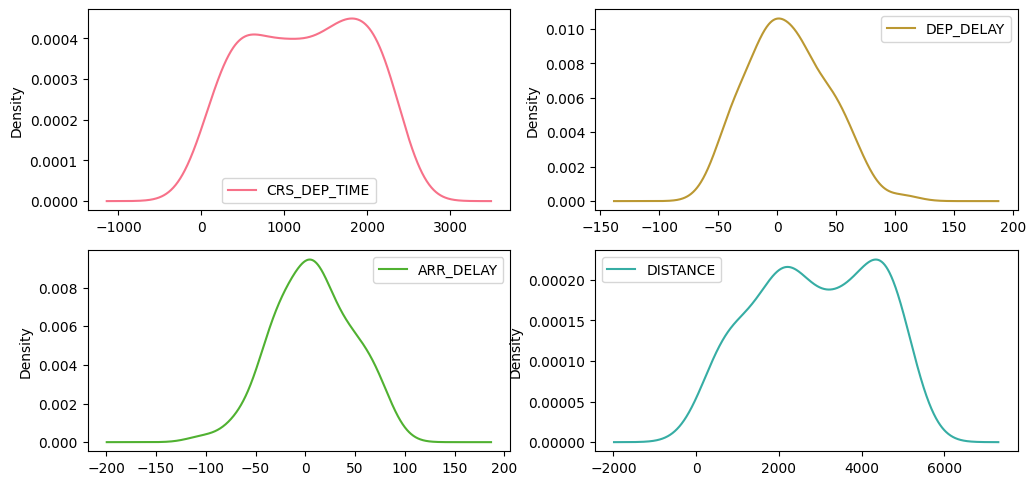

In [41]:
df.plot(
    kind="density",
    subplots=True,
    figsize=(12, 12),
    layout=(4, 2),
    sharex=False
)

plt.show()

<Axes: ylabel='Frequency'>

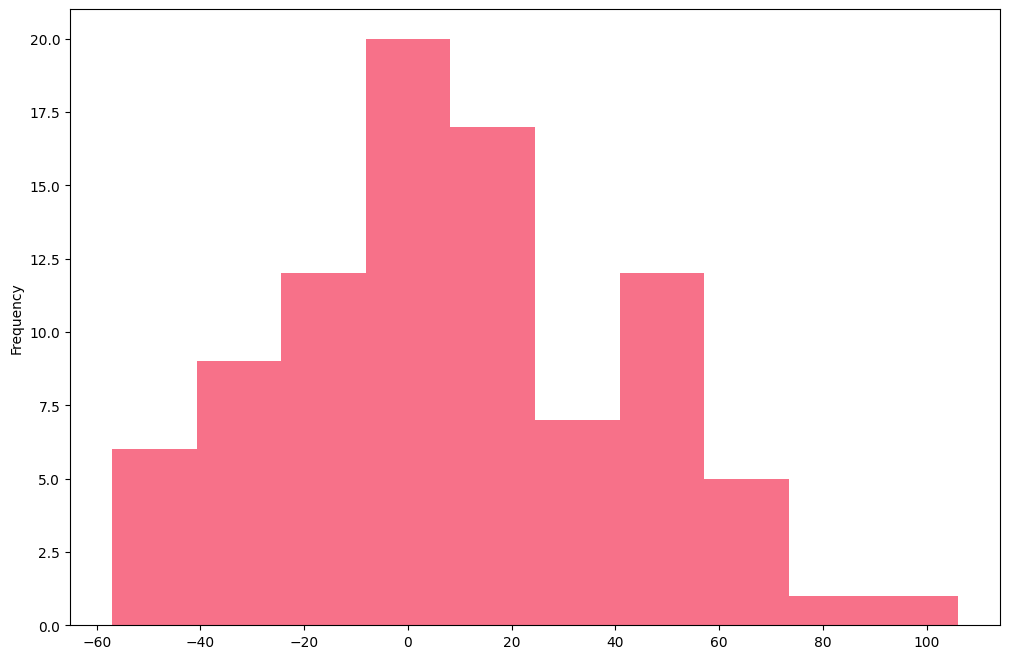

In [42]:
df['DEP_DELAY'].plot.hist()

# Análise por categorias

In [43]:
df['OP_UNIQUE_CARRIER'].value_counts()

OP_UNIQUE_CARRIER
SW       21
DL       17
AZUL     16
GOL      15
LATAM    12
UA       11
AA        8
Name: count, dtype: int64

# Análise de correlações

AA            Axes(0.1,0.679412;0.235294x0.220588)
AZUL     Axes(0.382353,0.679412;0.235294x0.220588)
DL       Axes(0.664706,0.679412;0.235294x0.220588)
GOL           Axes(0.1,0.414706;0.235294x0.220588)
LATAM    Axes(0.382353,0.414706;0.235294x0.220588)
SW       Axes(0.664706,0.414706;0.235294x0.220588)
UA                Axes(0.1,0.15;0.235294x0.220588)
dtype: object

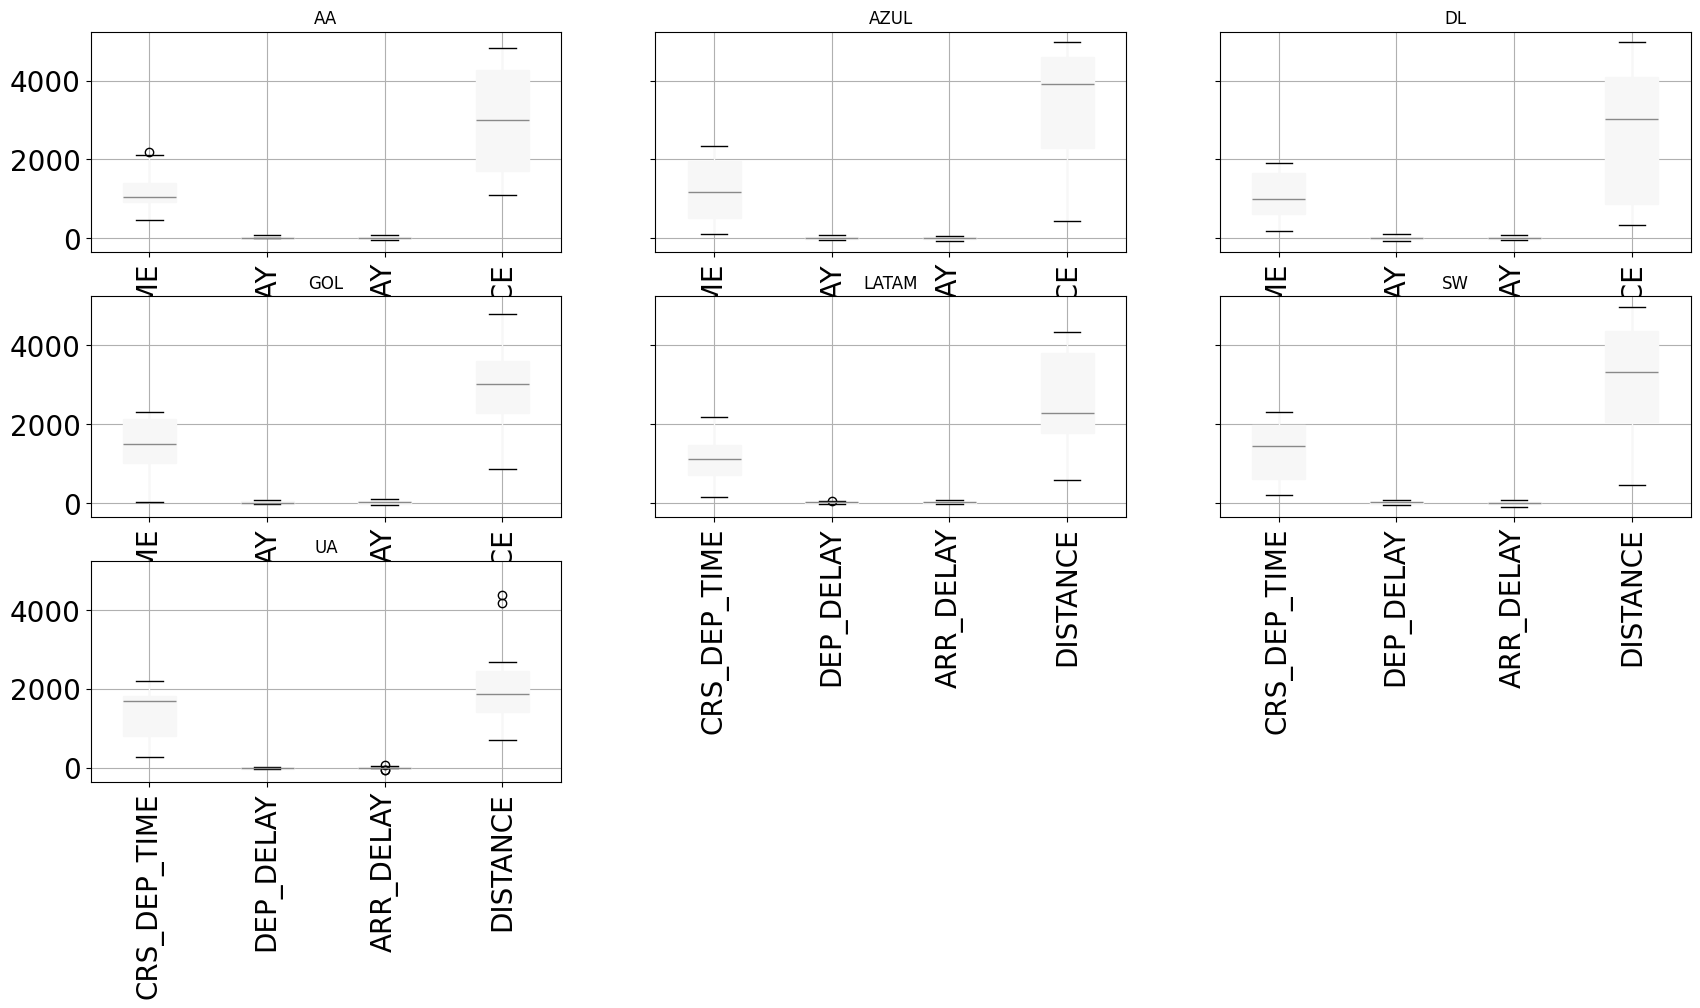

In [44]:
df.groupby('OP_UNIQUE_CARRIER').boxplot(
    fontsize=20,
    rot=90,
    figsize=(20, 10),
    patch_artist=True,
)

# Matriz de correlação

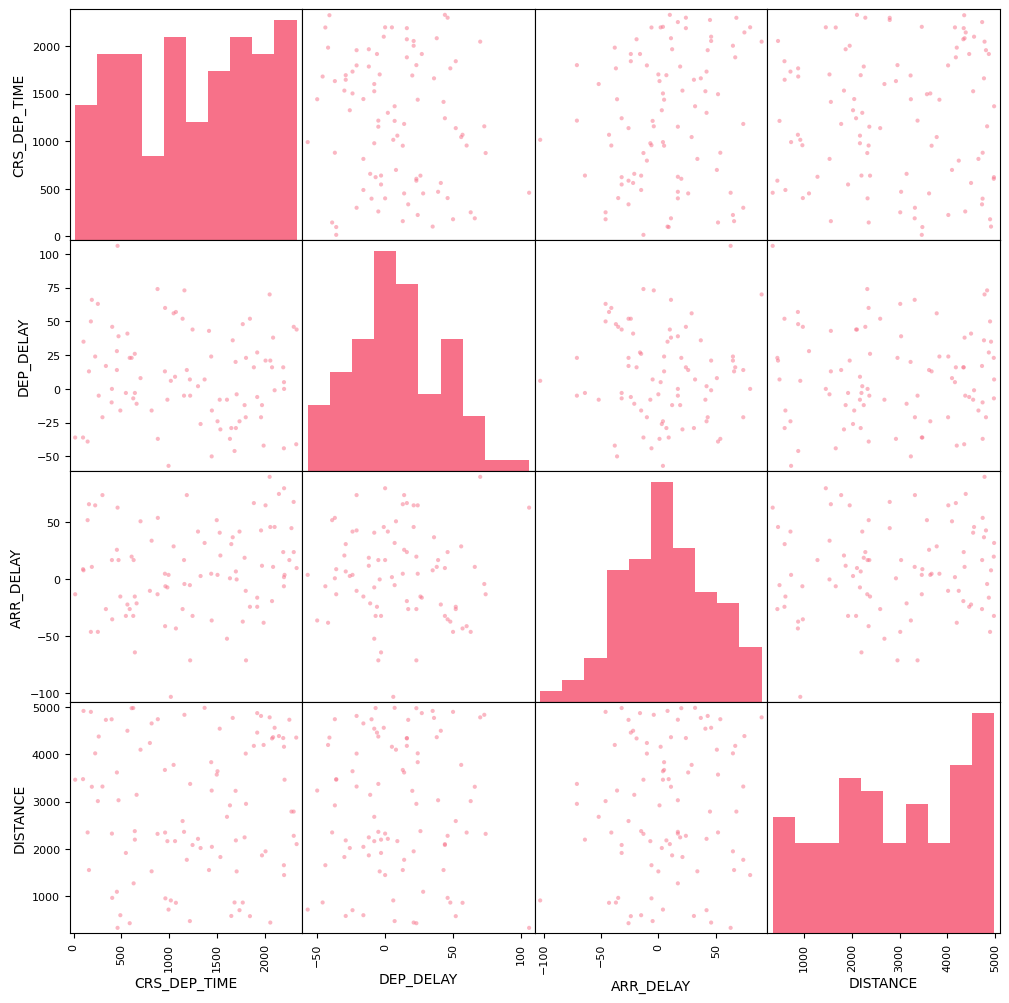

In [45]:
pd.plotting.scatter_matrix(
    df,
    figsize=(12, 12)
)

plt.show()

# Heatmap de correlação

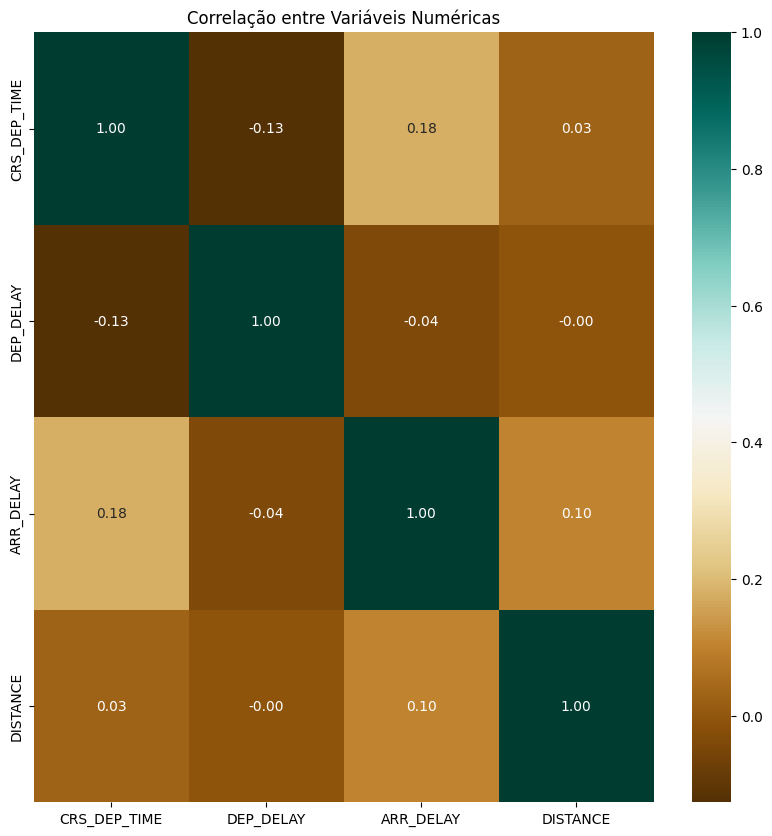

In [46]:
# Selecionar apenas colunas numéricas para correlação
numeric_columns = df.select_dtypes(include=[np.number])
corr_matrix = numeric_columns.corr()

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, cmap="BrBG", annot=True, fmt=".2f")
plt.title('Correlação entre Variáveis Numéricas')
plt.show()

# Análise de atrasos

In [47]:
# Estatísticas de atrasos
print("Estatísticas dos atrasos de partida:")
print(df['DEP_DELAY'].describe())

print("\nEstatísticas dos atrasos de chegada:")
print(df['ARR_DELAY'].describe())

Estatísticas dos atrasos de partida:
count     90.000000
mean       9.066667
std       33.684525
min      -57.000000
25%      -15.000000
50%        7.000000
75%       33.250000
max      106.000000
Name: DEP_DELAY, dtype: float64

Estatísticas dos atrasos de chegada:
count     90.000000
mean       7.688889
std       39.095574
min     -103.000000
25%      -20.500000
50%        6.000000
75%       36.250000
max       90.000000
Name: ARR_DELAY, dtype: float64


In [48]:
# Comparação de atrasos por companhia aérea
df.groupby('OP_UNIQUE_CARRIER')[['DEP_DELAY', 'ARR_DELAY']].mean().sort_values('ARR_DELAY')

,DEP_DELAY,ARR_DELAY
OP_UNIQUE_CARRIER,,
SW,8.789474,-3.833333
UA,-12.555556,1.700000
DL,8.588235,6.266667
AZUL,7.562500,7.285714
LATAM,12.272727,16.454545
AA,27.428571,16.571429
GOL,15.272727,16.733333


# Análise de rotas e distâncias

In [49]:
# Rotas mais frequentes
print("Top 10 rotas mais frequentes:")
df['ROTA'] = df['ORIGIN'] + ' → ' + df['DEST']
df['ROTA'].value_counts().head(10)

Top 10 rotas mais frequentes:


ROTA
GRU → SFO    7
JFK → FOR    5
BSB → MIA    5
GRU → MIA    5
LAX → SFO    4
ATL → DFW    4
BSB → SEA    4
BSB → DFW    4
GRU → FOR    3
JFK → DFW    3
Name: count, dtype: int64

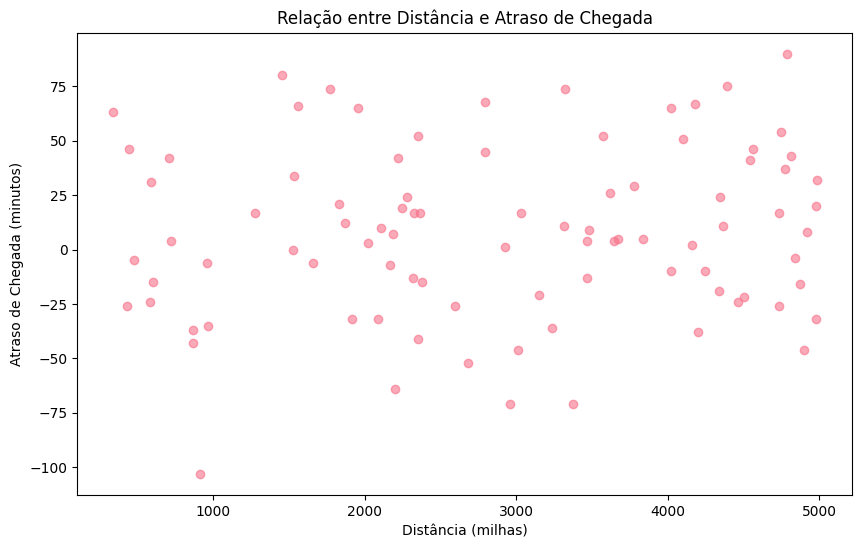

In [50]:
# Relação entre distância e atrasos
plt.figure(figsize=(10, 6))
plt.scatter(df['DISTANCE'], df['ARR_DELAY'], alpha=0.6)
plt.xlabel('Distância (milhas)')
plt.ylabel('Atraso de Chegada (minutos)')
plt.title('Relação entre Distância e Atraso de Chegada')
plt.show()

# Conclusões

In [51]:
# Principais insights da análise

print("RESUMO DA ANÁLISE DE VOOS")
print("=" * 40)

print(f"Total de voos analisados: {len(df)}")
print(f"Número de companhias aéreas: {df['OP_UNIQUE_CARRIER'].nunique()}")
print(f"Número de rotas únicas: {df['ROTA'].nunique()}")

print(f"\nAtraso médio de partida: {df['DEP_DELAY'].mean():.1f} minutos")
print(f"Atraso médio de chegada: {df['ARR_DELAY'].mean():.1f} minutos")

print(f"\nCompanhia com maior atraso médio: {df.groupby('OP_UNIQUE_CARRIER')['ARR_DELAY'].mean().idxmax()}")
print(f"Companhia com menor atraso médio: {df.groupby('OP_UNIQUE_CARRIER')['ARR_DELAY'].mean().idxmin()}")

print(f"\nDistância média dos voos: {df['DISTANCE'].mean():.0f} milhas")
print(f"Correlação distância vs atraso: {df['DISTANCE'].corr(df['ARR_DELAY']):.3f}")

RESUMO DA ANÁLISE DE VOOS
Total de voos analisados: 100
Número de companhias aéreas: 7
Número de rotas únicas: 43

Atraso médio de partida: 9.1 minutos
Atraso médio de chegada: 7.7 minutos

Companhia com maior atraso médio: GOL
Companhia com menor atraso médio: SW

Distância média dos voos: 2898 milhas
Correlação distância vs atraso: 0.103
